In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [3]:
data_dir = '../SQL/'
df_train = pd.read_csv(data_dir + 'TrainTable.csv')
df_test = pd.read_csv(data_dir + 'TestTable.csv')

In [25]:
features1 = ['AvgWinMargin1', 'AvgLoseMargin1', 'TwoPointPct1', 'ThreePointPct1', 'FreeThrowPct1', 'OffensiveRebounds1', 'DefensiveRebounds1', 'Rank1', 'AvgWinMargin2', 'AvgLoseMargin2', 'TwoPointPct2', 'ThreePointPct2', 'FreeThrowPct2', 'OffensiveRebounds2', 'DefensiveRebounds2', 'Rank2']
features2 = ['AvgWinMargin1', 'AvgLoseMargin1', 'TwoPointPct1', 'DefensiveRebounds1', 'Rank1', 'AvgWinMargin2', 'AvgLoseMargin2', 'TwoPointPct2', 'DefensiveRebounds2', 'Rank2']
features3 = ['Rank1', 'Rank2']
features4 = ['AvgWinMargin1', 'AvgWinMargin2']
features5 = ['TwoPointPct1', 'TwoPointPct2']

# features1 gives the best score
continuous = features1
target = 'Win'

In [26]:
X_train = df_train[continuous]
y_train = df_train[target]
X_test = df_test[continuous]
y_test = df_test[target]

In [27]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print 'Score is: {}'.format(score)

Score is: 0.683778234086


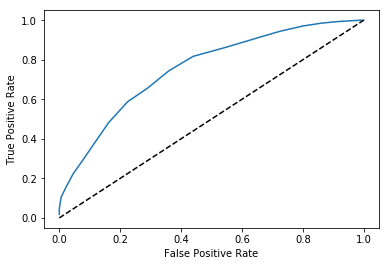

In [28]:
y_probas = clf.predict_proba(X_test)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_probas[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()